## How to know which investment is better?
## How could we estimate the future value of any stock?

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
start = dt.datetime(2020,1,1)
fb = pdr.get_data_yahoo("FB", start)
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006
2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998
2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001


## Rate of return

\begin{equation*}
R = \frac{V_f - V_{init}}{V_{init}} = \frac{V_f}{V_{init}} - 1
\end{equation*}
- $R$: Rate of return
- $V_{init}$: Initial value
- $V_f$: Final value

In [3]:
fb['RoR'] = round(fb['Close']/fb['Close'].shift() - 1,4)
fb.head()

,High,Low,Open,Close,Volume,Adj Close,RoR
Date,,,,,,,
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999,NaN
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998,-0.0053
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006,0.0188
2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998,0.0022
2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001,0.0101


In [4]:
round(208.669998/209.779999 - 1,4)

-0.0053

## %-change

\begin{equation*}
P_i = \frac{V_i}{V_{i-i}} - 1
\end{equation*}
- $P_i$: Pecentage change value
- $V_i$: Current value
- $V_{i-1}$: Previous value

In [5]:
fb['%-chg'] = round(fb['Close'].pct_change(),4)
fb.head()

,High,Low,Open,Close,Volume,Adj Close,RoR,%-chg
Date,,,,,,,,
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999,NaN,NaN
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998,-0.0053,-0.0053
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006,0.0188,0.0188
2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998,0.0022,0.0022
2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001,0.0101,0.0101


### Normalization

\begin{equation*}
N_i = \frac{V_i}{V_{init}}*100
\end{equation*}
- $N_i$: Normalized value
- $V_i$: Current value
- $V_{init}$: Initial value

In [6]:
fb['Norm'] = round((fb['Close']/fb.iloc[0]['Close'])*100,2)

In [7]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close,RoR,%-chg,Norm
Date,,,,,,,,,
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999,NaN,NaN,100.00
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998,-0.0053,-0.0053,99.47
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006,0.0188,0.0188,101.34
2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998,0.0022,0.0022,101.56
2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001,0.0101,0.0101,102.59


In [8]:
print(100*(1 - 0.005291))
print(100*(1 - 0.005291)*(1 + 0.018834))

99.4709
101.3443349306


In [9]:
# Annual rate of return
round(fb.loc['2020-12-31']['Close']/fb.iloc[0]['Close'] - 1,4)

0.3021

In [10]:
# Annual rate of return - Using RoR and Grouth Rate
fb['RoR'] = fb['Close'].pct_change()
fb['GF'] = fb['RoR'] + 1
round(fb['GF'].loc['2020-01-02':'2020-12-31'].prod() - 1,4)

0.3021

In [11]:
# The first value * Grouth Rate = Final Value
print(fb.iloc[0]['Close']*fb['GF'].loc['2020-01-02':'2020-12-31'].prod()) # first Value * Grouth Value
print(fb.loc['2020-12-31']['Close']) # Final Value

273.1600036621096
273.1600036621094


In [12]:
fb['GF'].loc['2020-01-02':'2020-12-31'].prod()

1.302126061834393

### CAGR calculation

\begin{equation*}
CAGR = \bigg(\frac{V_f}{V_{init}}\bigg)^{1/n} - 1
\end{equation*}
- $V_{init}$: Initial value
- $V_f$: Final value
- $n$: number of period

In [13]:
n = len(fb.loc['2020-01-02':'2020-12-31'])
cagr = (fb.loc['2020-12-31']['Close']/fb.loc['2020-01-02']['Close'])**(1/n) - 1
cagr

0.0010440163878484565

In [14]:
print((1 + cagr)**n)
print(fb['GF'].loc['2020-01-02':'2020-12-31'].prod())

1.3021260618343562
1.302126061834393


## How to do it for more than 1 stock?

In [15]:
tickers = ['FB', 'GOOG', 'HP','NVDA']
start = dt.datetime(2020,1,1)
end=dt.datetime(2020,12,31)

In [16]:
data = pdr.get_data_yahoo(tickers,start,end)
data.head()
# aapl = data.xs('AAPL',axis=1,level=1)
# goog = data.xs('GOOG',axis=1,level=1)
# hp = data.xs('HP',axis=1,level=1)
# nvda = data.xs('NVDA',axis=1,level=1)

Attributes   Adj Close                                           Close  \
Symbols             FB         GOOG         HP        NVDA          FB   
Date                                                                     
2020-01-02  209.779999  1367.369995  40.688660  239.377289  209.779999   
2020-01-03  208.669998  1360.660034  41.209965  235.545807  208.669998   
2020-01-06  212.600006  1394.209961  42.378403  236.533600  212.600006   
2020-01-07  213.059998  1393.339966  41.830139  239.397232  213.059998   
2020-01-08  215.220001  1404.319946  40.967293  239.846237  215.220001   

Attributes                                            High               ...  \
Symbols            GOOG         HP        NVDA          FB         GOOG  ...   
Date                                                                     ...   
2020-01-02  1367.369995  45.270000  239.910004  209.789993  1368.140015  ...   
2020-01-03  1360.660034  45.849998  236.070007  210.399994  1372.500000  ...   
2020-01-06  1394.209961  47.150002  237.059998  212.779999  1396.500000  ...   
2020-01-07  1393.339966  46.540001  239.929993  214.580002  1402.989990  ...   
2020-01-08  1404.319946  45.580002  240.380005  216.240005  1411.579956  ...   

Attributes        Low                    Open                          \
Symbols            HP        NVDA          FB         GOOG         HP   
Date                                                                    
2020-01-02  44.360001  236.720001  206.750000  1341.550049  45.860001   
2020-01-03  45.080002  234.100006  207.210007  1347.859985  46.250000   
2020-01-06  45.990002  231.270004  206.699997  1350.000000  46.200001   
2020-01-07  45.529999  236.389999  212.820007  1397.939941  46.880001   
2020-01-08  44.790001  238.149994  213.000000  1392.079956  46.189999   

Attributes                  Volume                                   
Symbols           NVDA          FB       GOOG         HP       NVDA  
Date                                                                 
2020-01-02  238.750000  12077100.0  1406600.0  1852400.0  5938400.0  
2020-01-03  235.100006  11188400.0  1186400.0  1293400.0  5134600.0  
2020-01-06  232.320007  17058900.0  1732300.0  2035100.0  6565900.0  
2020-01-07  238.199997  14912400.0  1502700.0  1110800.0  7871400.0  
2020-01-08  239.759995  13475000.0  1528000.0  1944700.0  6927700.0  

[5 rows x 24 columns]

In [17]:
data = data['Adj Close']
data.columns = tickers

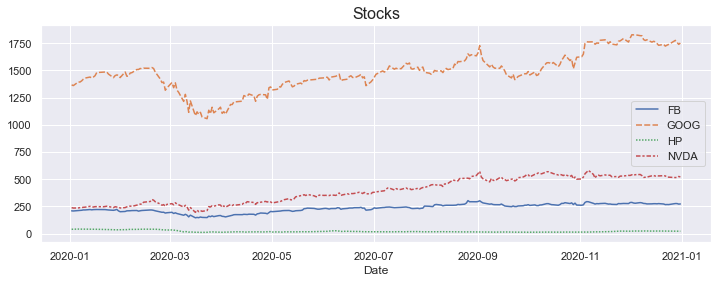

In [18]:
fig, ax = plt.subplots(figsize=[12,4])
ax=sns.lineplot(data=data)
ax.set_title('Stocks',fontsize=16)
plt.show()

In [19]:
df = (data.pct_change() +1).cumprod()
df.head()

,FB,GOOG,HP,NVDA
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.994709,0.995093,1.012812,0.983994
2020-01-06,1.013443,1.019629,1.041529,0.988120
2020-01-07,1.015635,1.018993,1.028054,1.000083
2020-01-08,1.025932,1.027023,1.006848,1.001959


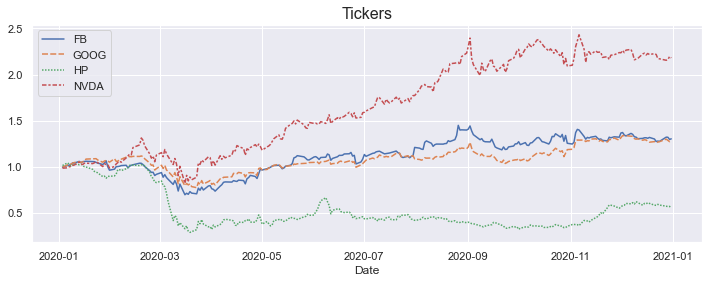

In [20]:
fig, ax = plt.subplots(figsize=[12,4])
ax = sns.lineplot(data=df)
ax.set_title('Tickers',fontsize=16)
plt.show()

## DOW Theory
- Devolop by Cahrles H. Dow
- Is an aproach to trading.
- Help as where the market gonna turn from a bear trend to a bull trend (is a relative or an absolut point?)
- Help to find the best time to invest on any stock.
- Market has **3 trends and phases**.


## 3 Phases
- First Phase: Identify if its a bear or a bull market.
- Second Phase: Focus on the point that the market change ¿Hpw can we identify it? It involves 4 key concepts:
> - HH: High-High: When a peak is higher than the previous peak.
> - HL: Hight-Low: The previus bottom was lower than the new one.
> - LH: Low-High: The new peak is lower than the previus one.
> - LL: Lowe-Low: The low is lower than the previous low.

> In a bear Market, there is just LL and LH. For a bull market tendency we need HL/HH consecutives. 

> Is a predictor to turn bear to bull market.

## Multiple tiem frames

So we start on the most broad one, the monthly, and then you go to the weekly and then the Daily, because you want all of them to conclude the same thing. So you want the monthly to conclude the same as a weekly as a daily.

what is the advantage of starting on a high level like this one?

the advantage is it's easy to make conclusions.

So, the idea is to look at:
- Monthly trend
- Weekly trend
- Daily trend  

In [24]:
fb_d = pdr.get_data_yahoo('FB',start,end,interval='d')
fb_w = pdr.get_data_yahoo('FB',start,end,interval='w')
fb_m = pdr.get_data_yahoo('FB',start,end,interval='m')

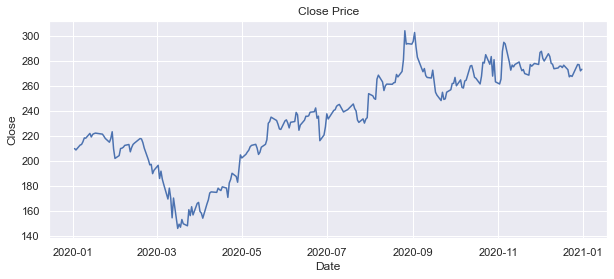

In [53]:
fig, ax = plt.subplots(figsize=[10,4])
ax=sns.lineplot(data=fb_d['Close'],palette='m')
ax.set_title('Close Price')
plt.show()

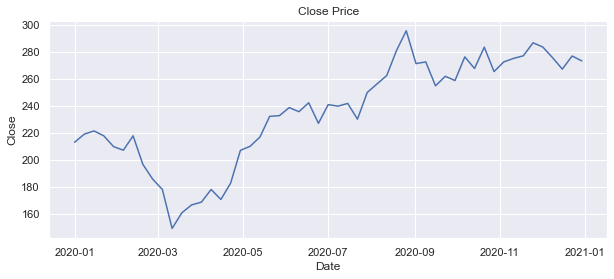

In [52]:
fig, ax = plt.subplots(figsize=[10,4])
ax=sns.lineplot(data=fb_w['Close'],palette='m')
ax.set_title('Close Price')
plt.show()

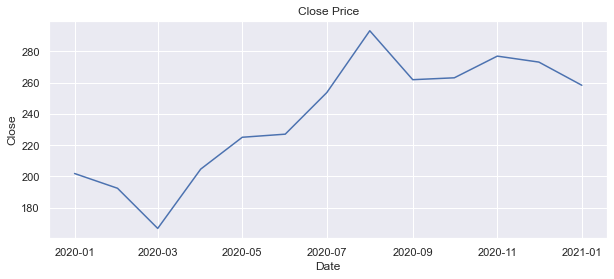

In [51]:
fig, ax = plt.subplots(figsize=[10,4])
ax=sns.lineplot(data=fb_m['Close'],palette='m')
ax.set_title('Close Price')
plt.show() 